<a href="https://colab.research.google.com/github/Yazir-Arafath/face_mask_tracking_using_yolov8/blob/main/face_mask_tracking_using_yolov8_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Feb  7 17:24:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from IPython.display import Image

In [3]:
!git clone https://github.com/MuhammadMoinFaisal/YOLOv8-DeepSORT-Object-Tracking.git

Cloning into 'YOLOv8-DeepSORT-Object-Tracking'...
remote: Enumerating objects: 403, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 403 (delta 21), reused 19 (delta 19), pack-reused 370
Receiving objects: 100% (403/403), 77.99 MiB | 17.41 MiB/s, done.
Resolving deltas: 100% (206/206), done.


In [4]:
!pwd

/content


In [5]:
%cd /content/YOLOv8-DeepSORT-Object-Tracking

/content/YOLOv8-DeepSORT-Object-Tracking


In [6]:
!pip install -e '.[dev]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/YOLOv8-DeepSORT-Object-Tracking
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.8/227.8 KB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 100.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 93.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
%cd /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


In [26]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="****************")
project = rf.workspace("rajamangala-university-technology-lanna").project("test-q7b4w")
dataset = project.version(13).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics<=8.0.20`, to intall it `pip install ultralytics<=8.0.20`.

Extracting Dataset Version Zip to test-13 in yolov8:: 100%|██████████| 23580/23580 [00:05<00:00, 4463.63it/s]


In [27]:
!gdown "https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t
To: /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/deep_sort_pytorch.zip
100% 43.1M/43.1M [00:00<00:00, 302MB/s]


In [10]:
!unzip 'deep_sort_pytorch.zip'

Archive:  deep_sort_pytorch.zip
  inflating: deep_sort_pytorch/.gitignore  
   creating: deep_sort_pytorch/configs/
  inflating: deep_sort_pytorch/configs/deep_sort.yaml  
   creating: deep_sort_pytorch/deep_sort/
  inflating: deep_sort_pytorch/deep_sort/__init__.py  
   creating: deep_sort_pytorch/deep_sort/__pycache__/
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-38.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-38.pyc  
   creating: deep_sort_pytorch/deep_sort/deep/
 extracting: deep_sort_pytorch/deep_sort/deep/__init__.py  
   creating: deep_sort_pytorch/deep_sort/deep/__pycache__/
  inflating: deep_sort_pytorch/d

In [11]:
HOME = '/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect'

In [12]:
%cd {HOME}

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


In [13]:
%cd {dataset.location}

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/test-5


In [28]:
%cd {HOME}

!python train.py model=yolov8l.pt data={dataset.location}/data.yaml epochs=15 imgsz=320

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/test-13/data.yaml, epochs=15, patience=50, batch=16, imgsz=320, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, ops

In [30]:
!ls /content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train5

args.yaml					     train_batch2.jpg
confusion_matrix.png				     train_batch3210.jpg
events.out.tfevents.1675794581.3befa23eac9a.17306.0  train_batch3211.jpg
F1_curve.png					     train_batch3212.jpg
P_curve.png					     val_batch0_labels.jpg
PR_curve.png					     val_batch0_pred.jpg
predictions.json				     val_batch1_labels.jpg
R_curve.png					     val_batch1_pred.jpg
results.csv					     val_batch2_labels.jpg
results.png					     val_batch2_pred.jpg
train_batch0.jpg				     weights
train_batch1.jpg


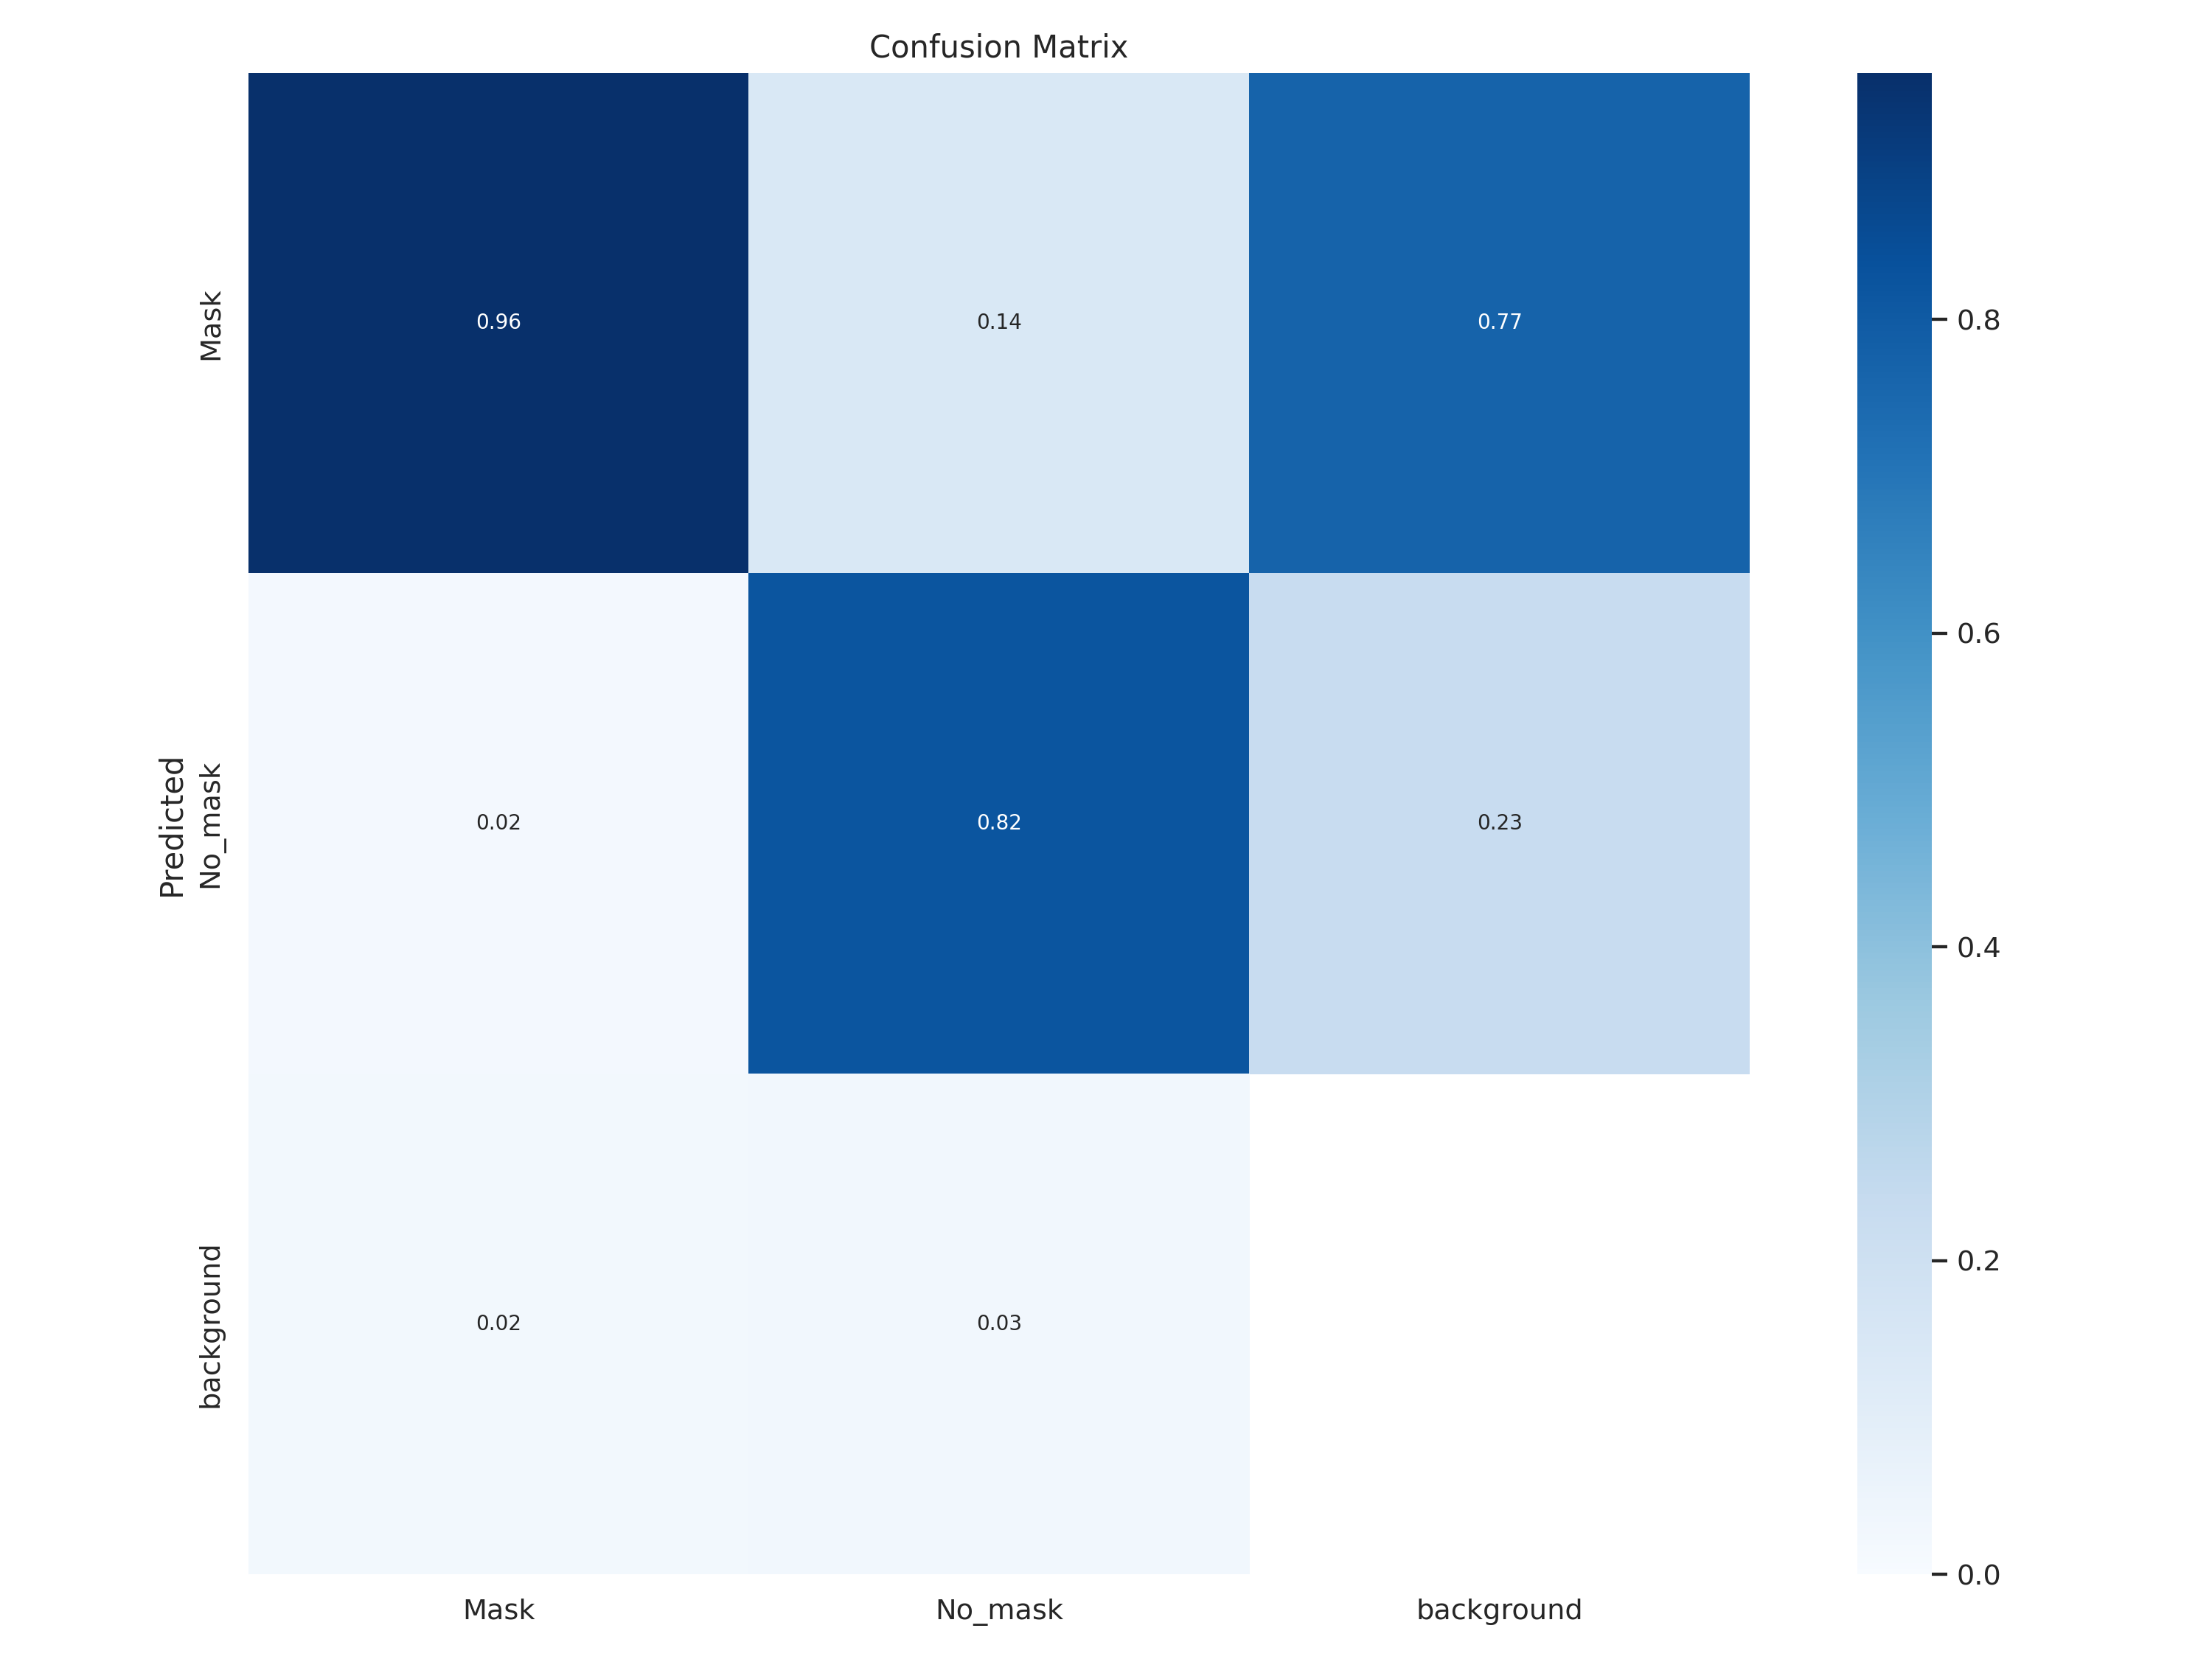

In [31]:
Image(filename = '/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train5/confusion_matrix.png')

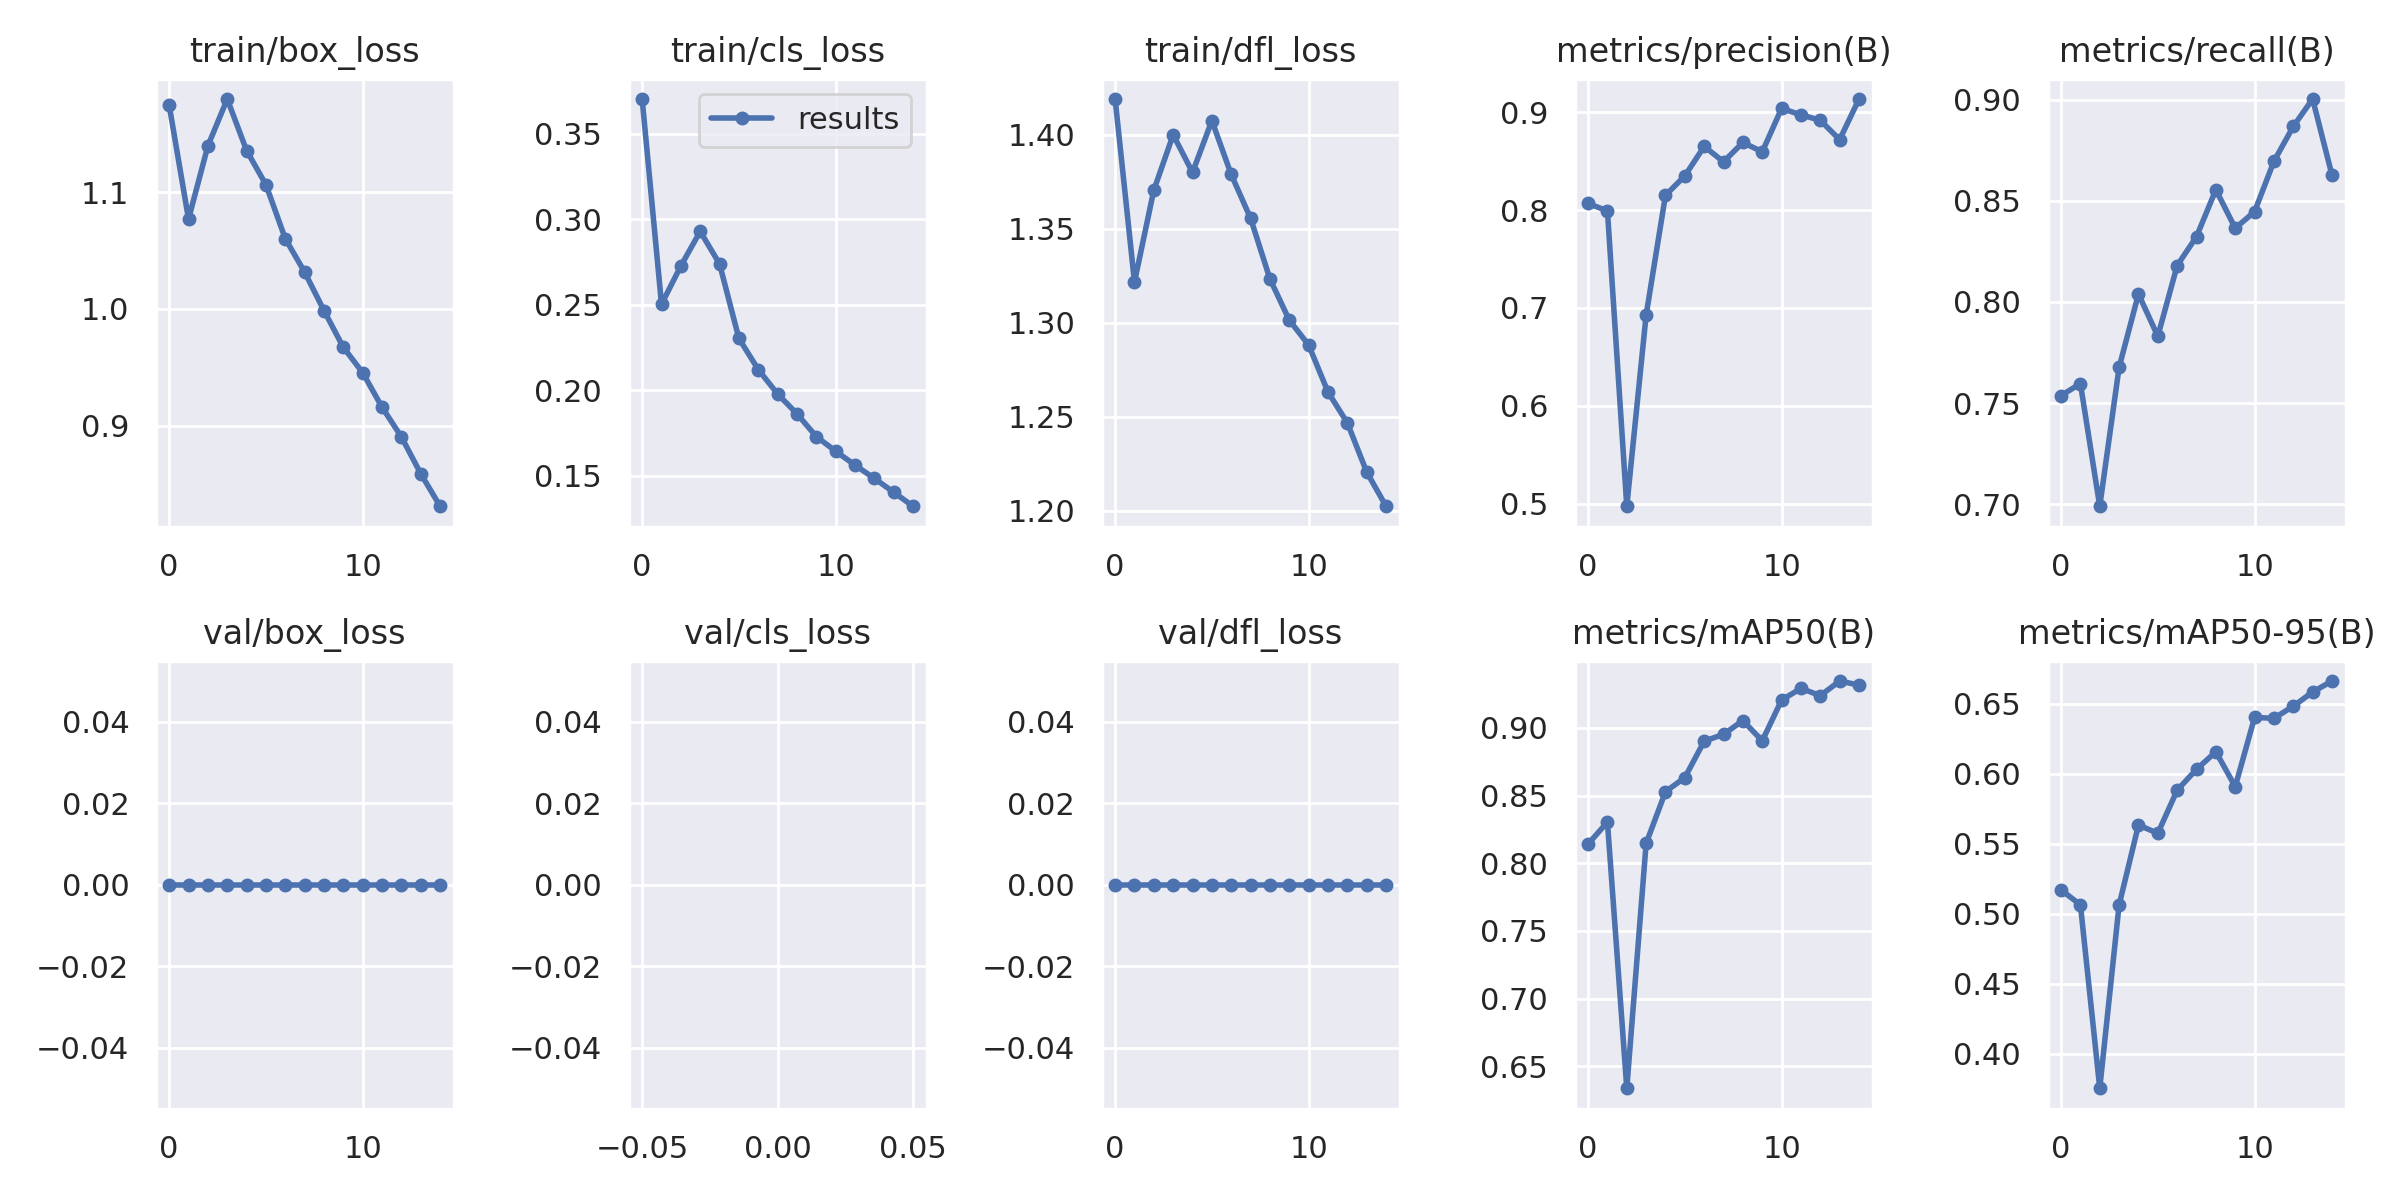

In [32]:
Image(filename = r'/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train5/results.png', width = 600)

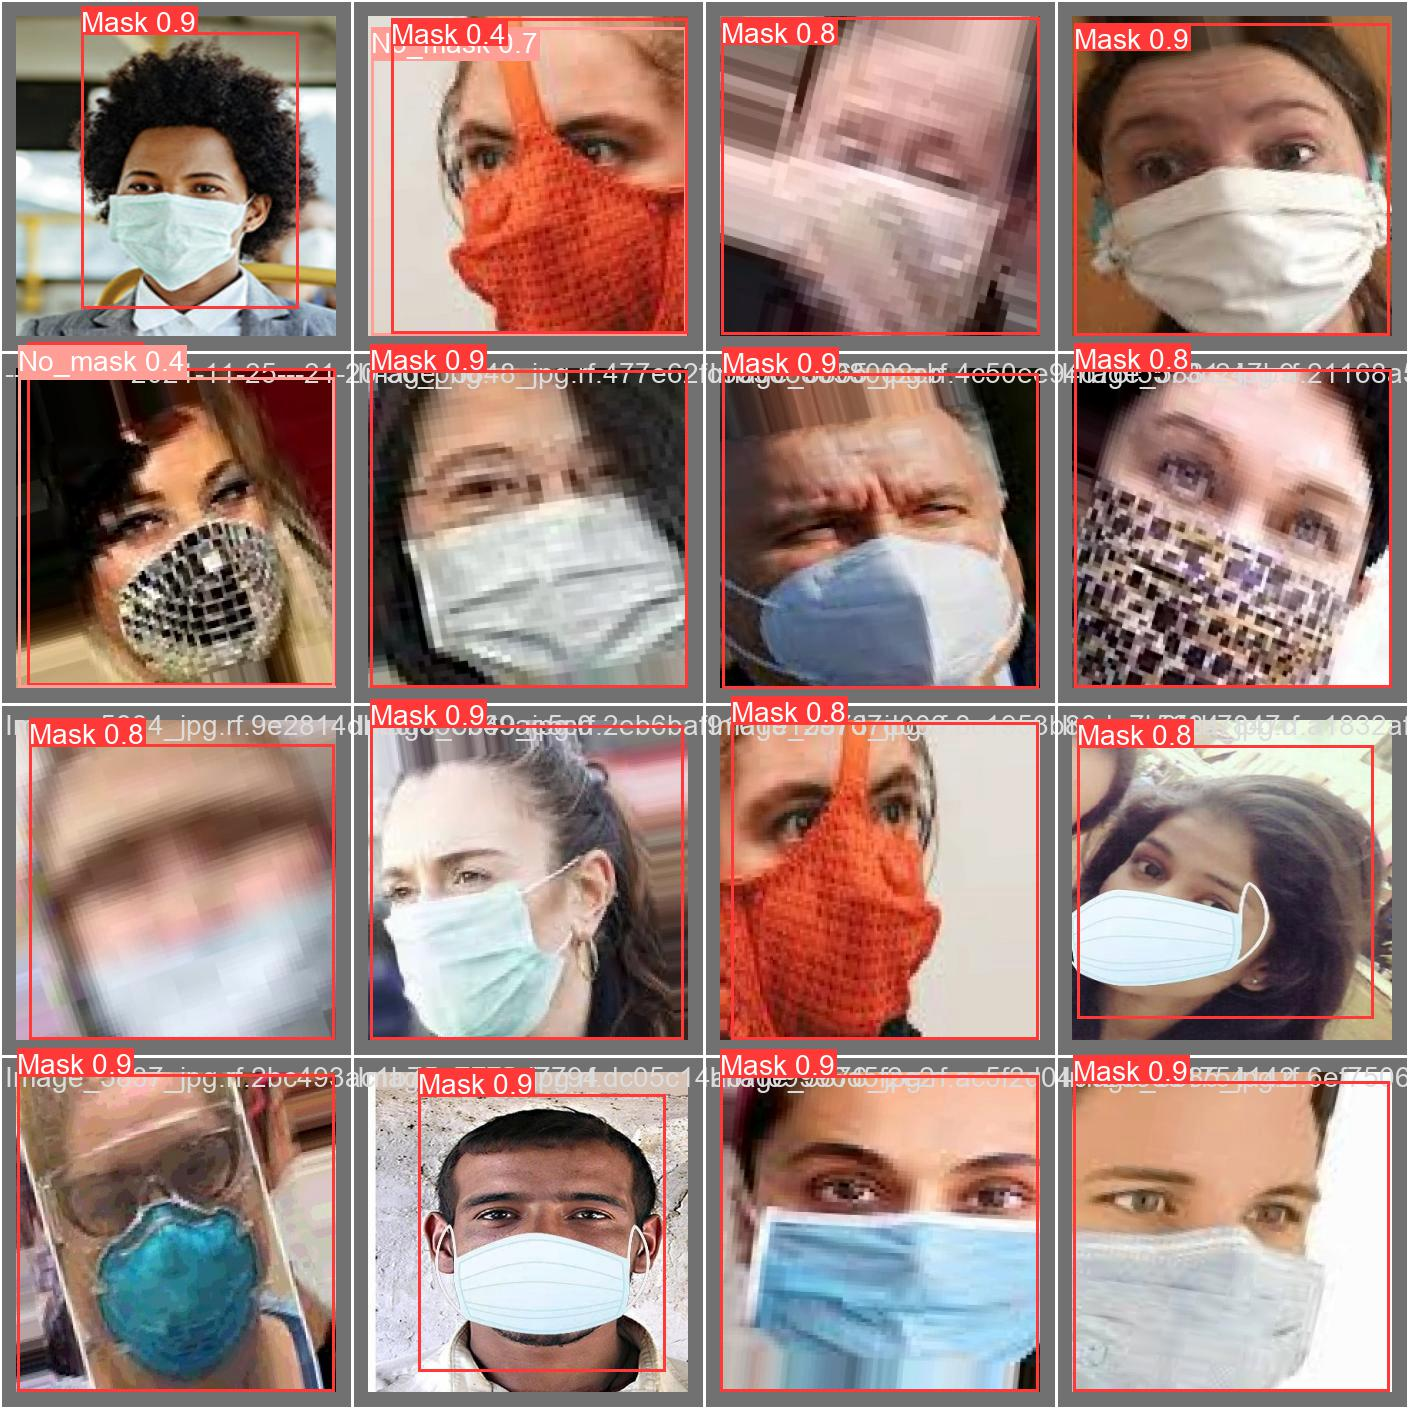

In [33]:
Image(filename = r'/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train5/val_batch0_pred.jpg', width =600)

In [20]:
!pwd

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


In [34]:
!python val.py model='/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train5/weights/best.pt' data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.3 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 268 layers, 43608150 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/test-13/valid/labels.cache... 1002 images, 7 backgrounds, 0 corrupt: 100% 1002/1002 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 63/63 [00:45<00:00,  1.39it/s]
                   all       1002       1521      0.607      0.489      0.458      0.243
                  Mask       1002       1189      0.749      0.638      0.639      0.341
               No_mask       1002        332      0.464       0.34      0.276      0.144
Speed: 0.7ms pre-process, 38.5ms inference, 0.0ms loss, 1.4ms post-process per image


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
!python predict.py model='/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train5/weights/best.pt' source='/content/drive/MyDrive/yolov8/Tensor.mp4'

[2023-02-07 19:19:25,528][root.tracker][INFO] - Loading weights from deep_sort_pytorch/deep_sort/deep/checkpoint/ckpt.t7... Done!
Ultralytics YOLOv8.0.3 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 268 layers, 43608150 parameters, 0 gradients, 164.8 GFLOPs
video 1/1 (1/1283) /content/drive/MyDrive/yolov8/Tensor.mp4: 384x640 1 No_mask, 42.2ms
video 1/1 (2/1283) /content/drive/MyDrive/yolov8/Tensor.mp4: 384x640 1 No_mask, 32.4ms
video 1/1 (3/1283) /content/drive/MyDrive/yolov8/Tensor.mp4: 384x640 1 No_mask, 32.4ms
video 1/1 (4/1283) /content/drive/MyDrive/yolov8/Tensor.mp4: 384x640 1 No_mask, 32.4ms
video 1/1 (5/1283) /content/drive/MyDrive/yolov8/Tensor.mp4: 384x640 1 No_mask, 32.3ms
video 1/1 (6/1283) /content/drive/MyDrive/yolov8/Tensor.mp4: 384x640 1 No_mask, 28.1ms
video 1/1 (7/1283) /content/drive/MyDrive/yolov8/Tensor.mp4: 384x640 1 No_mask, 25.2ms
video 1/1 (8/1283) /content/drive/MyDrive/yolov8/Tensor.mp4: 384x640 1 No_mask, 23.